# Assignment 3: Plotting Asthma Data

In this assignment, I will display asthma data with multiple graphs with the data I groomed in assignment 2 and new data I found for this assignment.

Asthma Prevalence by State found [here](https://www.cdc.gov/asthma/brfss/2015/tableC1.htm).

Asthma Prevalence by demography found [here](https://data.world/cdc/children-with-current-asthma).

1. Libraries used: Pandas, matplotlib
2. DS applied: I used Pandas DataFrames (df), Matplotlib axes (ax)
3. Graphs produced: line, bar, normal distr, pie
4. Features explored: ggplot, x-y labels, x-y ticks, legend, title, rot(ation), figsize, fontsize, color, bins, labels, autopct

In [1]:
# Data used in this assignment was found here:
# 2015 Adult Asthma Data: Prevalence Tables and Maps: https://www.cdc.gov/asthma/brfss/2015/tableC1.htm

# I will also be using data from the previous asgn. Collected from: https://data.world/cdc/children-with-current-asthma



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')
plt.close('all')

dataset_dem = "./asthma_dataset_by_dem.csv"
dataset_terr = "./asthma_rates_territory.csv"


[Text(0, 0, '1999'),
 Text(0, 0, '2001'),
 Text(0, 0, '2003'),
 Text(0, 0, '2005'),
 Text(0, 0, '2007'),
 Text(0, 0, '2009'),
 Text(0, 0, '2011'),
 Text(0, 0, '2013')]

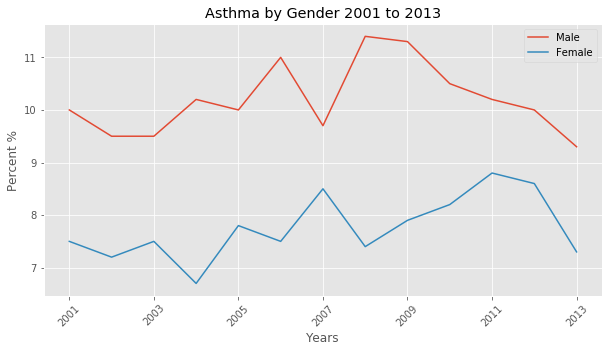

In [2]:
# Let's first consider differences in gender data
use_cols = [i for i in range(1,14)]
df_gender = pd.read_csv(dataset_dem, nrows=2,header=1, skiprows=[2,3],usecols=use_cols)
# reading 2 rows from the demographic dataset, male and female
df_gender
# years = [i for i in range(2001,2014)]
gender_plt = df_gender.transpose().plot(kind="line", title="Asthma by Gender 2001 to 2013", rot="45", figsize=(10,5))
gender_plt.set_xlabel("Years") # sets x label as year
gender_plt.set_ylabel("Percent %") # sets y label as %
gender_plt.legend(["Male","Female"]) # labels male and female
gender_plt.set_xticklabels([str(i) for i in range(1999,2014,2)]) # indexes ticks


# Plot Line graphs of years by percent


[Text(0, 0, 'KY'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'ME'),
 Text(0, 0, 'VT'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'CT'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'PR'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'NH'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'HI'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'AL'),
 Text(0, 0, 'MO'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'AZ'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'ND'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'KS'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'SD'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'LA'),
 Text(0, 0, 'NV'),
 Text(0, 0, 'WY'),
 Text(0, 0, 'VA'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'CA'),
 Text(0, 0, 'IA'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'NJ'),
 Text(0, 0, 'NE'),
 Text(0, 0, 

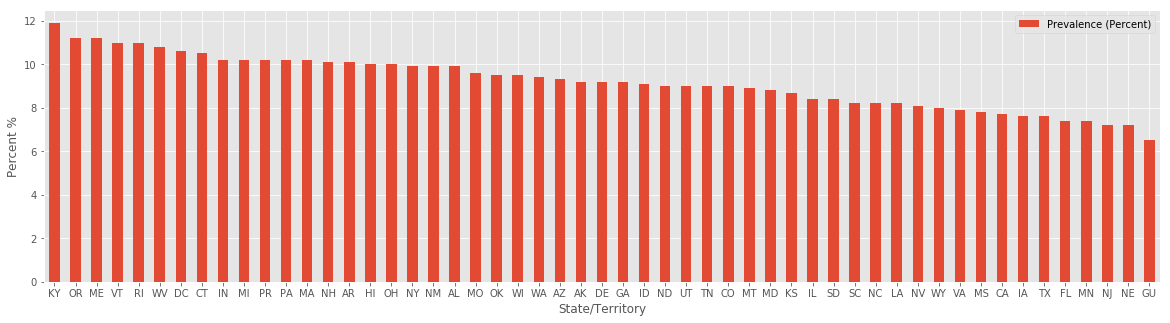

In [3]:
# Now use the new dataset
df_terr = pd.read_csv(dataset_terr, usecols=[0,1,2], skiprows=[1,53])
df_sort = df_terr.sort_values(by='Prevalence (Percent)', ascending=False)
# df_terr

# Lets create a sorted bar graph that sorts from most to least prevalent states
state_plt = df_sort.plot(kind='bar', figsize=(20,5), fontsize=10) # We will use a bargraph 
state_plt.set_xlabel("State/Territory") # sets x label as State
state_plt.set_ylabel("Percent %") # sets y label as Percentage
state_plt.set_xticklabels(list(df_sort['State']),rotation=0) # Adds State to X-ticks to see the values

/Users/alexlue/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Percentage')

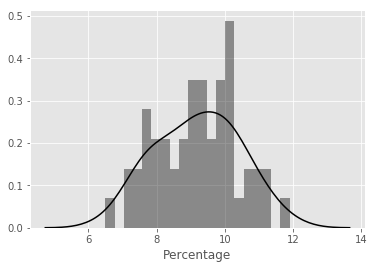

In [4]:
# We can also normalize the data that we have to find the avg % by territory

values = list(df_terr['Prevalence (Percent)']) # collecting the %'s and storing into a list
values
norm_plt = sns.distplot(tuple(values), bins=20, color='k') # We will use the seaborn package to create the plots to normalise values
norm_plt.set_xlabel("Percentage")

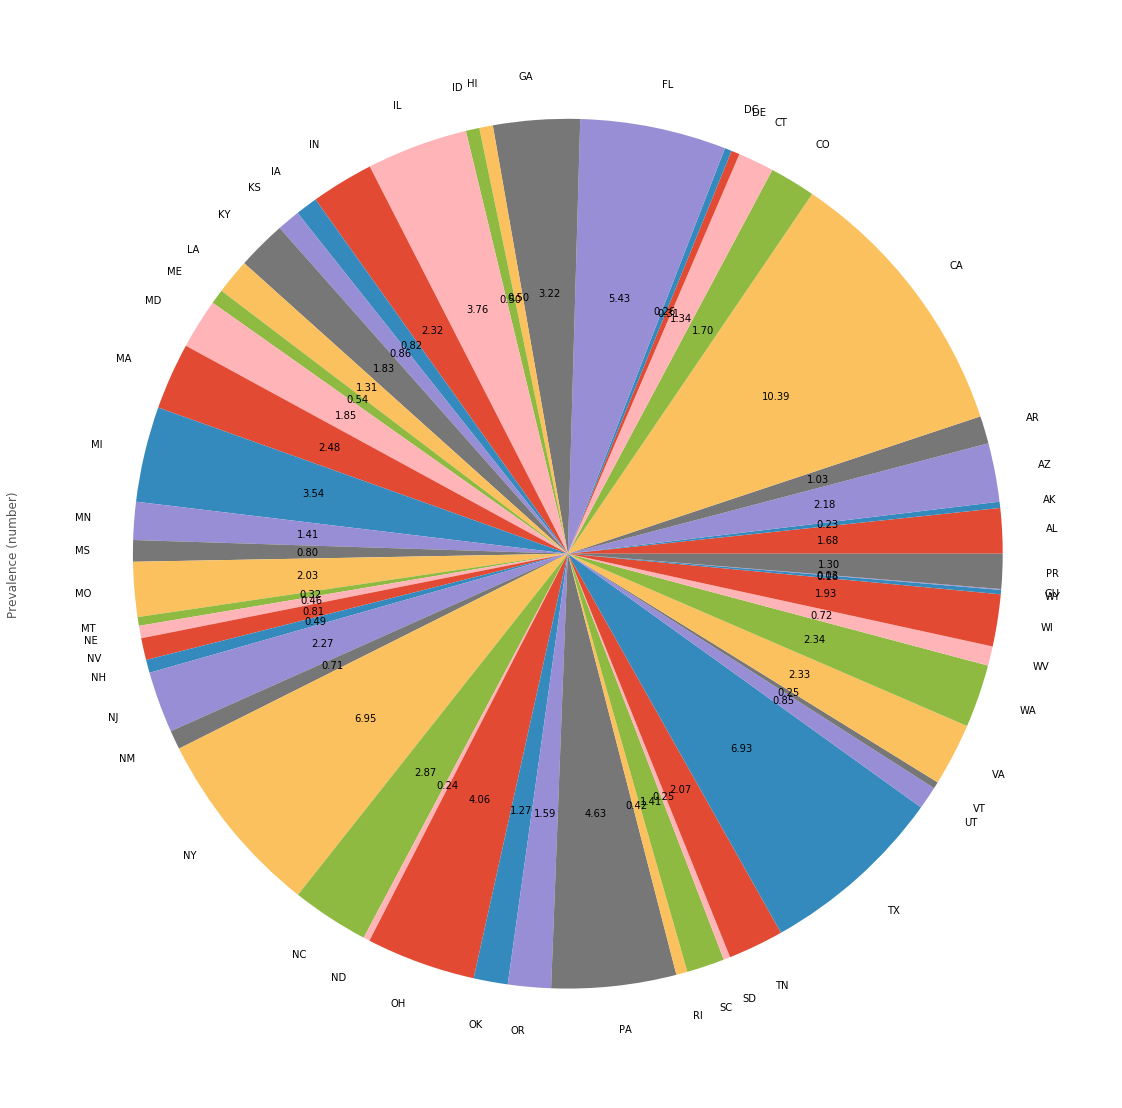

In [5]:
# Lets now make a pie chart of the distribution of prevalence based off the sample
# So we will use the estimated Prevalence (number) to measure this

df_terr_prev = pd.read_csv(dataset_terr, usecols=[0,5], skiprows=[1,53]) 
# gets dataset, uses only the Prevalence & state col

values = list(df_terr_prev['Prevalence (number)']) # Get values into a list
values = [int("".join(i.split(","))) for i in values] 
# Since these are comma-valued strings, we must strip the ',' and then put the values back into df_terr_prev
df_terr_prev['Prevalence (number)'] = values
df_terr_prev

#creates a pie chart with states and respective proportions
pie_plt = df_terr_prev.plot(kind="pie", y='Prevalence (number)', figsize=(20,20), autopct='%.2f',
                            labels=df_terr_prev['State'], legend=False, fontsize=10)


In [6]:
# I now want to save the last plot we made. We follow the instructions from the book:
plot = gender_plt.get_figure() # Gets the figure as a pyplot object
plot.savefig('genders.png', bbox_inches='tight') # Saves the pyplot as 'genders.png' in the home dir